# <h1 align="center"><font color="red">Intervalo de confiança e intervalo de previsão</font></h1>

<font color="yellow">Data Scientist.: Dr. Eddy Giusepe Chirinos Isidro</font>

<font color="orange">Este Notebook está baseado no maravilhoso tutorial de [Avi Chawla](https://blog.dailydoseofds.com/p/confidence-interval-and-prediction-d53).</font>

# <font color="gree">Contextualizando</font>

`Estimativas estatísticas sempre apresentam alguma incerteza.`

Por exemplo, um modelo de regressão linear nunca prevê um valor real.

Considere um exemplo simples de modelagem de preços de casas apenas com base em sua área. Uma previsão não diria o valor real de uma casa com base em sua área. Isso ocorre porque diferentes casas do mesmo tamanho podem ter preços diferentes.

Em vez disso, o que ele prevê é o `valor médio` relacionado ao resultado em uma entrada específica

![](https://substackcdn.com/image/fetch/w_1456,c_limit,f_webp,q_auto:good,fl_progressive:steep/https%3A%2F%2Fsubstack-post-media.s3.amazonaws.com%2Fpublic%2Fimages%2F74771dda-6319-45c5-bec0-1309165658f3_1702x502.png)

A questão é…

`Sempre há alguma incerteza envolvida em estimativas estatísticas, e é importante comunicá-la.`

Neste caso específico, existem dois tipos de incertezas:

`1.` A incerteza na estimativa do verdadeiro valor médio.

`2.` A incerteza na estimativa do valor real.

`O intervalo de confiança e o intervalo de previsão nos ajudam a capturar essas incertezas.`



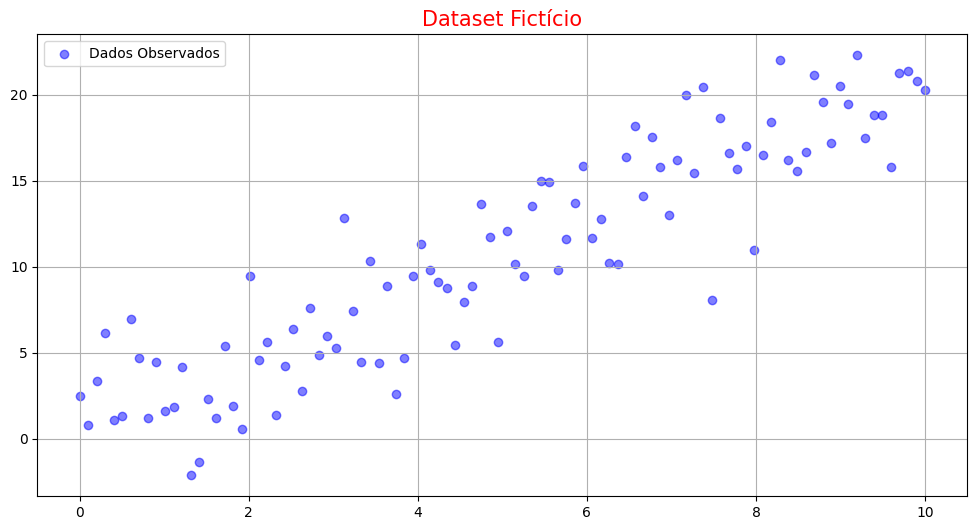

In [1]:
# Vamos a considerar o seguinte conjunto de dados mock:

import numpy as np
import matplotlib.pyplot as plt

# Semente aleatória para reprodutibilidade:
np.random.seed(42)



x = np.linspace(0, 10, 100) # Esta função cria um array de 100 valores igualmente espaçados entre 0 e 10, inclusive. O resultado é um array 'x' com 100 valores, começando em 0 e terminando em 10.
y = 2*x + 1 + 3*np.random.randn(100) # O resultado é um array y de 100 valores, que são basicamente os valores da linha reta mais algum ruído aleatório.
# np.random.randn(100): Esta função gera um array de 100 números aleatórios seguindo uma distribuição normal (média 0 e desvio padrão 1). 3*np.random.randn(100): Multiplica-se os 100 números aleatórios por 3, resultando em um array de números aleatórios com desvio padrão 3.


plt.figure(figsize=(12, 6))
plt.scatter(x, y, color="blue", marker="o", alpha=0.5, label="Dados Observados") # A label é necessário para que seja usado na legend()
plt.title("Dataset Fictício", c="r", size=15)
plt.legend()
plt.grid(True)
plt.show()


Vamos ajustar um `Modelo de Regressão linear` usando `statsmodel` e imprimir uma parte do resumo da regressão:

In [2]:
import statsmodels.api as sm # https://www.statsmodels.org/stable/index.html

X = sm.add_constant(x)

model = sm.OLS(y, X) # OLS (Ordinary Least Squares), ou MQO (Mínimos Quadrados Ordinários), é um método de estimação usado em regressão linear. 

res = model.fit()

print(res.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     473.4
Date:                Sat, 27 Jul 2024   Prob (F-statistic):           2.66e-39
Time:                        21:42:04   Log-Likelihood:                -241.52
No. Observations:                 100   AIC:                             487.0
Df Residuals:                      98   BIC:                             492.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4816      0.543      0.887      0.3

<font color="orange">Observe que o coeficiente do preditor `“x1”` é `2.0414` com um intervalo de `95%` de `[1.855, 2.228]`.

É um intervalo de `95%` porque `0,975-0,025 = 0,95.`

Isso é conhecido como `Intervalo de Confiança`, que vem da `incerteza da amostragem`.</font>

Mais especificamente, essa incerteza surge porque os dados que usamos acima para modelagem `são apenas uma amostra da população`.

![](https://substackcdn.com/image/fetch/w_1456,c_limit,f_webp,q_auto:good,fl_progressive:steep/https%3A%2F%2Fsubstack-post-media.s3.amazonaws.com%2Fpublic%2Fimages%2F7f1378c6-d4d0-4ec8-b387-f564eedafc0f_539x234.png)

<font color="orange">Então, se reuníssemos mais amostras desse tipo e ajustássemos um OLS a cada amostra, o coeficiente verdadeiro (`que só podemos saber se tivermos os dados de toda a população`) estaria `95%` do tempo nesse intervalo de confiança.</font>

Em seguida, usamos esse modelo para fazer uma previsão da seguinte forma:

In [3]:
res.get_prediction([1, 3]).summary_frame(0.05)


,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,6.605701,0.331737,5.94738,7.264021,1.137109,12.074293


* O valor previsto é `6.605701` (`mean`).

* O Intervalo de Confiança de `95%` é `[5.94738, 7.264021]`.

* O Intervalo de Previsão de 95% é `[1.137109, 12.074293]`.

O `Intervalo de Confiança` que vimos acima era para o `coeficiente`, então o que o Intervalo de Confiança representa neste caso?

Semelhante ao que discutimos acima, os dados são apenas uma amostra da população.

O `fit de regressão` obtido por esta amostra produziu uma previsão (`algum valor médio`) para a entrada `x=3`.

Entretanto, se reuníssemos mais amostras desse tipo e ajustássemos um MCO a cada conjunto de dados, o verdadeiro valor médio (que só podemos saber se tivermos os dados para toda a população) para essa entrada específica (x=3) estaria 95% do tempo nesse intervalo de confiança.



Chegando ao `Intervalo de Previsão` . . . 


. . . percebemos que ele é mais amplo que o `Intervalo de Confiança`. Por que é, e o que esse intervalo diz?

O que vimos acima com o intervalo de confiança foi sobre estimar a `verdadeira média populacional` em uma entrada específica.

O que estamos falando agora é sobre obter um intervalo onde o valor verdadeiro de uma entrada pode estar.

`Assim, essa incerteza adicional aparece porque em nosso conjunto de dados, para o mesmo valor de input $x$, pode haver múltiplos valores diferentes do resultado. Isso é descrito abaixo:`



![](https://substackcdn.com/image/fetch/f_auto,q_auto:good,fl_progressive:steep/https%3A%2F%2Fsubstack-post-media.s3.amazonaws.com%2Fpublic%2Fimages%2Ff60dc41c-6ea1-454a-aaee-6f0cf8f484dd_1320x780.png)

<font color="orange">Portanto, é mais amplo que o `Intervalo de Confiança`. Traçando-o em todo o intervalo de entrada, obtemos o seguinte gráfico:</font>

![](https://substackcdn.com/image/fetch/f_auto,q_auto:good,fl_progressive:steep/https%3A%2F%2Fsubstack-post-media.s3.amazonaws.com%2Fpublic%2Fimages%2F062c1ce4-05af-44b4-a17f-066fac7b7f3b_2548x1316.png)

Dado que o modelo está prevendo um valor médio (conforme ilustrado abaixo), temos que representar a `incerteza de previsão` de que o valor real pode estar em qualquer lugar no intervalo de previsão:

![](https://substackcdn.com/image/fetch/f_auto,q_auto:good,fl_progressive:steep/https%3A%2F%2Fsubstack-post-media.s3.amazonaws.com%2Fpublic%2Fimages%2F4f6a2d1f-fd73-4c39-a196-3c5a90f7237f_1669x628.png)

Um `Intervalo de Previsão` de `95%` nos diz que podemos ter `95%` de certeza de que o `valor real` dessa observação estará dentro desse intervalo.


Então para resumir:

* Um intervalo de confiança captura a incerteza de amostragem. Mais dados significam menos incerteza de amostragem, o que por sua vez leva a um intervalo menor.

* Além da incerteza de amostragem, o `Intervalo de Predição` também representa a incerteza na estimativa do valor verdadeiro de um ponto de dados específico. Portanto, é mais amplo do que o intervalo de confiança.



`Comunicar essas incertezas é crucial na tomada de decisões porque proporciona uma compreensão mais clara da confiabilidade e precisão das previsões.`

# <font color="blue">Intervalo de confiança de `95%`</font>

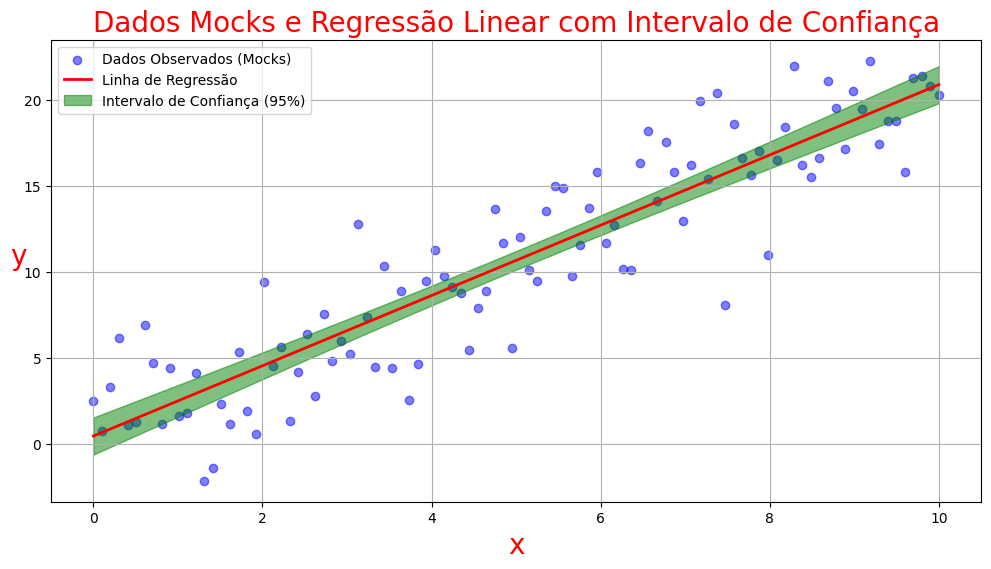

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Semente aleatória para reprodutibilidade:
np.random.seed(42)

# Gerar dados Mocks:
x = np.linspace(0, 10, 100)
y = 2*x + 1 + 3*np.random.randn(100)

# Ajuste da Regressão Linear:
X = sm.add_constant(x)  # Adiciona uma constante para o intercepto
model = sm.OLS(y, X).fit()

# Valores previstos:
y_pred = model.predict(X)

# Calcular o Intervalo de Confiança (IC):
predictions = model.get_prediction(X)
pred_int = predictions.conf_int(alpha=0.05)  # 95% de confiança

# Plotando:
plt.figure(figsize=(12, 6))
plt.scatter(x, y, color="blue", marker="o", alpha=0.5, label="Dados Observados (Mocks)")
# Plotar a Linha de Regressão:
plt.plot(x, y_pred, color="red", label="Linha de Regressão", linewidth=2)
# Plotar as curvas de confiança:
plt.fill_between(x, pred_int[:, 0], pred_int[:, 1], color='green', alpha=0.5, label="Intervalo de Confiança (95%)")
# Configurações do gráfico
plt.title("Dados Mocks e Regressão Linear com Intervalo de Confiança", fontsize=20, color="r")
plt.xlabel("x", fontsize=20, color="r")
plt.ylabel("y", fontsize=20, color="r", rotation=360)
plt.legend()
plt.grid(True)
plt.show()

# <font color="blue">Intervalo de confiança de `95%` e Intervalo de Predição de `95%`</font>

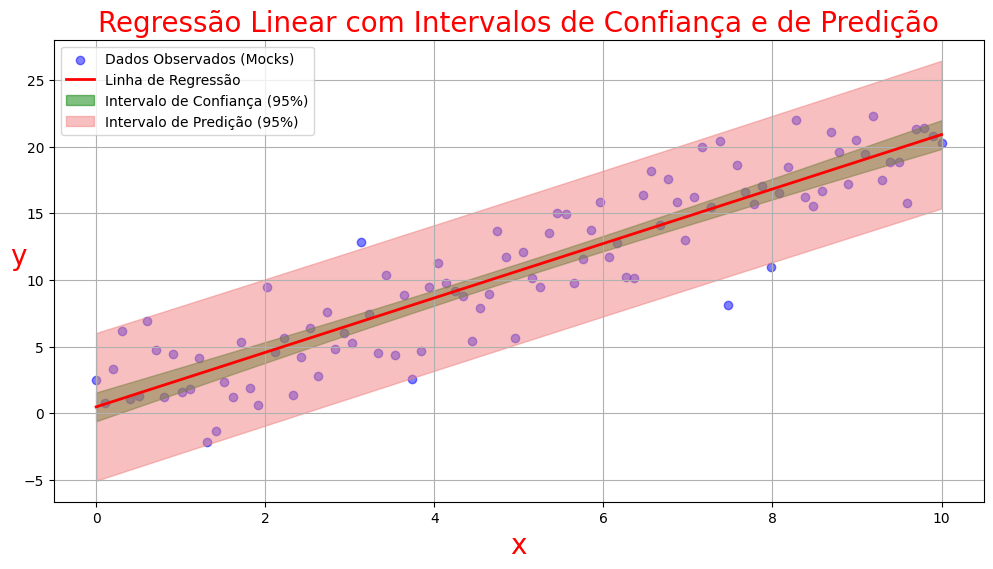

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Semente aleatória para reprodutibilidade:
np.random.seed(42)

# Gerar dados Mocks:
x = np.linspace(0, 10, 100)
y = 2 * x + 1 + 3 * np.random.randn(100)


# Ajuste da Regressão Linear:
X = sm.add_constant(x)  # Adiciona uma constante para o intercepto
model = sm.OLS(y, X).fit()

# Previsões:
predictions = model.predict(X)

# Intervalos de confiança e de predição:
predictions_summary_frame = model.get_prediction(X).summary_frame(alpha=0.05)
predicted_mean = predictions_summary_frame['mean']
mean_ci_lower = predictions_summary_frame['mean_ci_lower']
mean_ci_upper = predictions_summary_frame['mean_ci_upper']
pred_int_lower = predictions_summary_frame['obs_ci_lower']
pred_int_upper = predictions_summary_frame['obs_ci_upper']

# Plotando:
plt.figure(figsize=(12, 6))
plt.scatter(x, y, color="blue", marker="o", alpha=0.5, label="Dados Observados (Mocks)")
plt.plot(x, predictions, color="red", label="Linha de Regressão", linewidth=2)
# Intervalos de Confiança (IC):
plt.fill_between(x, mean_ci_lower, mean_ci_upper, color='green', alpha=0.5, label='Intervalo de Confiança (95%)')
# Intervalos de Predição:
plt.fill_between(x, pred_int_lower, pred_int_upper, color='lightcoral', alpha=0.5, label='Intervalo de Predição (95%)')
# Configurações do gráfico:
plt.title("Regressão Linear com Intervalos de Confiança e de Predição", fontsize=20, color="r")
plt.xlabel("x", fontsize=20, color="r")
plt.ylabel("y", fontsize=20, color="r", rotation=360)
plt.legend()
plt.grid(True)
plt.show()